# Converting binary masks to shapefiles for Kalyan ROI
## Developement version

This notebook illustrates the conversion of a ground truth or segmentation result binary mask to a shapefile. The example is using the ROI from a 2007 RGB image of Kalyan, India. 

Python and Satsense imports:

In [1]:
# Python imports
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
# satsense imports
from satsense.util.mask import load_mask_from_file # loading binary masks from file
from satsense.util.conversions import mask2multipolygon as m2mp #conversion of a mask to multipolygon 
from satsense.util.shapefile import show_multipolygon as shmp # visualization of multipolygons
from satsense.util.shapefile import save_multipolygon2shapefile as sm2sh # saving of multipolygon to shapefile

Parameters and paths.

In [2]:
# parameters
TRUTH_MASKS_PATH = '/home/elena/DynaSlum/Data/Kalyan/masks/'
RESULTS_MASKS_PATH = '/home/elena/DynaSlum/Results/Kalyan/Segmentation/'

ext_mask = 'tif'
ext_shape = 'shp'

# world coordinate transform
t = [101985.0, 300.0379266750948, 0.0,
     2826915.0, 0.0, -300.041782729805]

# visualization params
RED = '#FF0000'
GREEN = '#00FF00'
BLUE = '#0000FF'
offset = 100
al = 0.8

ROIs = ['ROI1']

### Conversion of masks to multipolygons

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Loading  ROI1
---------------------------------------------------------------------------------------
Converting  ROI1


/home/elena/anaconda3/envs/satelite/lib/python3.5/site-packages/rasterio/features.py:102: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
Ring Self-intersection at or near point 1547267.6927939316 2625887.0055710305


Not a valid polygon, using its buffer!
Truth builtup multipolygon:  True


Ring Self-intersection at or near point 1407149.9810366624 1395715.6963788301


Not a valid polygon, using its buffer!
Result builtup multipolygon:  True


Ring Self-intersection at or near point 1179421.1946902655 2292840.6267409474


Not a valid polygon, using its buffer!
Truth nonbuiltup multipolygon:  True


Ring Self-intersection at or near point 200997.51580278127 1386714.4428969361


Not a valid polygon, using its buffer!
Result nonbuiltup multipolygon:  True


Ring Self-intersection at or near point 1121513.8748419723 1703558.5654596102


Not a valid polygon, using its buffer!
Truth slum multipolygon:  True


Ring Self-intersection at or near point 858080.57522123889 1116676.8384401116


Not a valid polygon, using its buffer!
Result slum multipolygon:  True
---------------------------------------------------------------------------------------
Visualizing  ROI1
---------------------------------------------------------------------------------------
Saving  ROI1


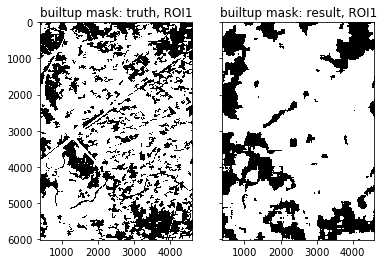

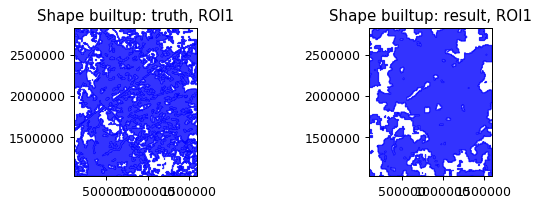

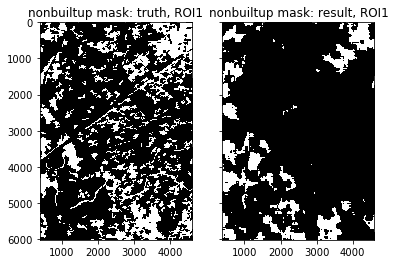

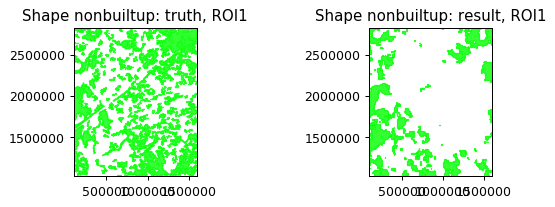

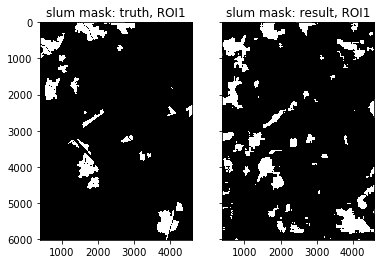

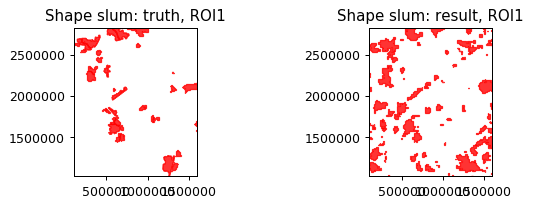

In [3]:
# Loading, visualizations and calculations
for roi in ROIs:
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Loading ", roi)
    # Filenames
    truth_builtup_mask_fname = 'Kalyan_' + roi + '_builtupMask' + '.' + ext_mask
    truth_nonbuiltup_mask_fname = 'Kalyan_' + roi + '_nonbuiltupMask' + '.' + ext_mask
    truth_slum_mask_fname = 'Kalyan_' + roi + '_slumMask' + '.' + ext_mask

    truth_builtup_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_builtup_mask_fname)
    truth_nonbuiltup_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_nonbuiltup_mask_fname)
    truth_slum_mask_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_slum_mask_fname)

    result_builtup_mask_fname = 'Kalyan_' + roi + '_builtupResult' + '.' + ext_mask
    result_nonbuiltup_mask_fname = 'Kalyan_' + roi + '_nonbuiltupResult' + '.' + ext_mask
    result_slum_mask_fname = 'Kalyan_' + roi + '_slumResult' + '.' + ext_mask

    result_builtup_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, result_builtup_mask_fname)
    result_nonbuiltup_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, result_nonbuiltup_mask_fname)
    result_slum_mask_fullfname = os.path.join(RESULTS_MASKS_PATH, result_slum_mask_fname)

   
    # load the masks into numpy arrays
    truth_builtup_mask = load_mask_from_file(truth_builtup_mask_fullfname)
    result_builtup_mask = load_mask_from_file(result_builtup_mask_fullfname)

    truth_nonbuiltup_mask = load_mask_from_file(truth_nonbuiltup_mask_fullfname)
    result_nonbuiltup_mask = load_mask_from_file(result_nonbuiltup_mask_fullfname)

    truth_slum_mask = load_mask_from_file(truth_slum_mask_fullfname)
    result_slum_mask = load_mask_from_file(result_slum_mask_fullfname)

    # conversion of the masks to multipolygons
    print("---------------------------------------------------------------------------------------")
    print("Converting ", roi)
    truth_builtup_multi = m2mp(truth_builtup_mask, truth_builtup_mask, t)
    print("Truth builtup multipolygon: ", truth_builtup_multi.is_valid)
    result_builtup_multi = m2mp(result_builtup_mask, result_builtup_mask, t)
    print("Result builtup multipolygon: ", result_builtup_multi.is_valid)
    
    truth_nonbuiltup_multi = m2mp(truth_nonbuiltup_mask, truth_nonbuiltup_mask, t)
    print("Truth nonbuiltup multipolygon: ", truth_nonbuiltup_multi.is_valid)
    result_nonbuiltup_multi = m2mp(result_nonbuiltup_mask, result_nonbuiltup_mask, t)
    print("Result nonbuiltup multipolygon: ", result_nonbuiltup_multi.is_valid)
    
    truth_slum_multi = m2mp(truth_slum_mask, truth_slum_mask, t)
    print("Truth slum multipolygon: ", truth_slum_multi.is_valid)
    result_slum_multi = m2mp(result_slum_mask, result_slum_mask, t)
    print("Result slum multipolygon: ", result_slum_multi.is_valid)
    
    #visualization
    print("---------------------------------------------------------------------------------------")
    print("Visualizing ", roi)
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(truth_builtup_mask, cmap='gray'), ax1.set_title('builtup mask: truth, ' + roi)
    ax2.imshow(result_builtup_mask,cmap='gray'), ax2.set_title('builtup mask: result, ' + roi)
    
    fig = plt.figure(dpi=90)
    txmin, tymin, txmax, tymax = truth_builtup_multi.bounds
    rxmin, rymin, rxmax, rymax = result_builtup_multi.bounds
    xmin = min(txmin, rxmin)
    ymin = min(tymin, rymin)
    xmax = max(txmax, rxmax)
    ymax = max(tymax, rymax)
    extent = int(xmin) - offset, int(ymin) - offset, int(xmax) + offset, int(ymax) + offset
    ax1 = fig.add_subplot(131)
    shmp(truth_builtup_multi, ax1, False, extent, BLUE, al, 'Shape builtup: truth, ' + roi)
    ax3 = fig.add_subplot(133)
    shmp(result_builtup_multi, ax3, False, extent, BLUE, al, 'Shape builtup: result, ' + roi)
    
        
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(truth_nonbuiltup_mask,cmap='gray'), ax1.set_title('nonbuiltup mask: truth, ' + roi)
    ax2.imshow(result_nonbuiltup_mask,cmap='gray'), ax2.set_title('nonbuiltup mask: result, ' + roi)
    
    fig = plt.figure(dpi=90)
    txmin, tymin, txmax, tymax = truth_nonbuiltup_multi.bounds
    rxmin, rymin, rxmax, rymax = result_nonbuiltup_multi.bounds
    xmin = min(txmin, rxmin)
    ymin = min(tymin, rymin)
    xmax = max(txmax, rxmax)
    ymax = max(tymax, rymax)
    ax1 = fig.add_subplot(131)
    shmp(truth_nonbuiltup_multi, ax1, False, extent, GREEN, al, 'Shape nonbuiltup: truth, ' + roi)
    ax3 = fig.add_subplot(133)
    shmp(result_nonbuiltup_multi, ax3, False, extent, GREEN, al, 'Shape nonbuiltup: result, ' + roi)
    
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(truth_slum_mask,cmap='gray'), ax1.set_title('slum mask: truth, ' + roi)
    ax2.imshow(result_slum_mask,cmap='gray'), ax2.set_title('slum mask: result, ' + roi)
    
    fig = plt.figure(dpi=90)
    txmin, tymin, txmax, tymax = truth_slum_multi.bounds
    rxmin, rymin, rxmax, rymax = result_slum_multi.bounds
    xmin = min(txmin, rxmin)
    ymin = min(tymin, rymin)
    xmax = max(txmax, rxmax)
    ymax = max(tymax, rymax)
    ax1 = fig.add_subplot(131)
    shmp(truth_slum_multi, ax1, False, extent, RED, al, 'Shape slum: truth, ' + roi)
    ax3 = fig.add_subplot(133)
    shmp(result_slum_multi, ax3, False, extent, RED, al, 'Shape slum: result, ' + roi)
    
    #visualization
    print("---------------------------------------------------------------------------------------")
    print("Saving ", roi)
    
    # Filenames
    truth_builtup_shape_fname = 'Kalyan_' + roi + '_builtupMask' + '.' + ext_shape
    truth_nonbuiltup_shape_fname = 'Kalyan_' + roi + '_nonbuiltupMask' + '.' + ext_shape
    truth_slum_shape_fname = 'Kalyan_' + roi + '_slumMask' + '.' + ext_shape

    truth_builtup_shape_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_builtup_shape_fname)
    truth_nonbuiltup_shape_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_nonbuiltup_shape_fname)
    truth_slum_shape_fullfname = os.path.join(TRUTH_MASKS_PATH, truth_slum_shape_fname)

    result_builtup_shape_fname = 'Kalyan_' + roi + '_builtupResult' + '.' + ext_shape
    result_nonbuiltup_shape_fname = 'Kalyan_' + roi + '_nonbuiltupResult' + '.' + ext_shape
    result_slum_shape_fname = 'Kalyan_' + roi + '_slumResult' + '.' + ext_shape

    result_builtup_shape_fullfname = os.path.join(RESULTS_MASKS_PATH, result_builtup_shape_fname)
    result_nonbuiltup_shape_fullfname = os.path.join(RESULTS_MASKS_PATH, result_nonbuiltup_shape_fname)
    result_slum_shape_fullfname = os.path.join(RESULTS_MASKS_PATH, result_slum_shape_fname)

    # saving multipolygons to shape files
    sm2sh(truth_builtup_multi, truth_builtup_shape_fullfname) 
    sm2sh(truth_nonbuiltup_multi, truth_nonbuiltup_shape_fullfname) 
    sm2sh(truth_slum_multi, truth_slum_shape_fullfname) 

    sm2sh(result_builtup_multi, result_builtup_shape_fullfname) 
    sm2sh(result_nonbuiltup_multi, result_nonbuiltup_shape_fullfname) 
    sm2sh(result_slum_multi, result_slum_shape_fullfname) 

    